In [1]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np
from scipy import stats

class ScratchDecisionTreeClassifierDepth1:
    def __init__(self):
        self.best_threshold = None
        self.best_feature_index = None
        self.majority_class_left = None
        self.majority_class_right = None
        
    def calculate_gini_impurity(self, class_counts):
        total_count = np.sum(class_counts)
        if total_count == 0:
            return 0.0
        proportions = class_counts / total_count
        gini = 1.0 - np.sum(proportions ** 2)
        return gini

    def calculate_information_gain(self, parent_counts, left_counts, right_counts):
        parent_gini = self.calculate_gini_impurity(parent_counts)
        total_samples = np.sum(parent_counts)
        left_weight = np.sum(left_counts) / total_samples
        right_weight = np.sum(right_counts) / total_samples
        left_gini = self.calculate_gini_impurity(left_counts)
        right_gini = self.calculate_gini_impurity(right_counts)
        
        information_gain = parent_gini - (left_weight * left_gini + right_weight * right_gini)
        return information_gain

    def fit(self, X, y):
        best_information_gain = -1
        
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] < threshold
                right_mask = ~left_mask
                
                y_left = y[left_mask]
                y_right = y[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                
                left_counts = np.bincount(y_left, minlength=2)
                right_counts = np.bincount(y_right, minlength=2)
                parent_counts = np.bincount(y, minlength=2)
                
                information_gain = self.calculate_information_gain(parent_counts, left_counts, right_counts)
                
                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    self.best_threshold = threshold
                    self.best_feature_index = feature_index
                    self.majority_class_left = np.argmax(left_counts)
                    self.majority_class_right = np.argmax(right_counts)

    def predict(self, X):
        if self.best_feature_index is None:
            raise ValueError("The model has not been trained yet. Call fit() before predict().")
        
        predictions = np.where(X[:, self.best_feature_index] < self.best_threshold, 
                               self.majority_class_left, 
                               self.majority_class_right)
        return predictions

## Problem Five: Learning and estimation

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris_dataset = load_iris()
X = iris_dataset['data'][:, :2]
y = iris_dataset['target']

# Filter out instances where the target is 2
binary_mask = y != 2
X_binary = X[binary_mask]
y_binary = y[binary_mask]

# Split the binary dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=0)

# Print the targets to confirm they are binary (0 or 1)
print(y_train)
print(y_test)

[1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1]


In [4]:
# Train and predict with the scratch implementation
scratch_clf = ScratchDecisionTreeClassifierDepth1()
scratch_clf.fit(X_train, y_train)
scratch_predictions = scratch_clf.predict(X_test)
print('Scratch Model Predictions:', scratch_predictions)

Scratch Model Predictions: [0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1]


#### Comparing our algorithm with Scikit-learn's

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Train and predict with scikit-learn's Decision Tree Classifier
sklearn_clf = DecisionTreeClassifier(random_state=42)
sklearn_clf.fit(X_train, y_train)
sklearn_predictions = sklearn_clf.predict(X_test)

In [7]:
# Calculate evaluation metrics for the scratch implementation
scratch_accuracy = accuracy_score(y_test, scratch_predictions)
scratch_precision = precision_score(y_test, scratch_predictions)
scratch_recall = recall_score(y_test, scratch_predictions)

# Calculate evaluation metrics for scikit-learn's implementation
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
sklearn_precision = precision_score(y_test, sklearn_predictions)
sklearn_recall = recall_score(y_test, sklearn_predictions)

# Print the evaluation results
print("Evaluation Metrics:")
print("Scratch Implementation:")
print(f"  Accuracy: {scratch_accuracy:.2f}")
print(f"  Precision: {scratch_precision:.2f}")
print(f"  Recall: {scratch_recall:.2f}")

print("\nScikit-learn Implementation:")
print(f"  Accuracy: {sklearn_accuracy:.2f}")
print(f"  Precision: {sklearn_precision:.2f}")
print(f"  Recall: {sklearn_recall:.2f}")


Evaluation Metrics:
Scratch Implementation:
  Accuracy: 0.93
  Precision: 0.93
  Recall: 0.93

Scikit-learn Implementation:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00


## Problem Six: Visualization of decision area

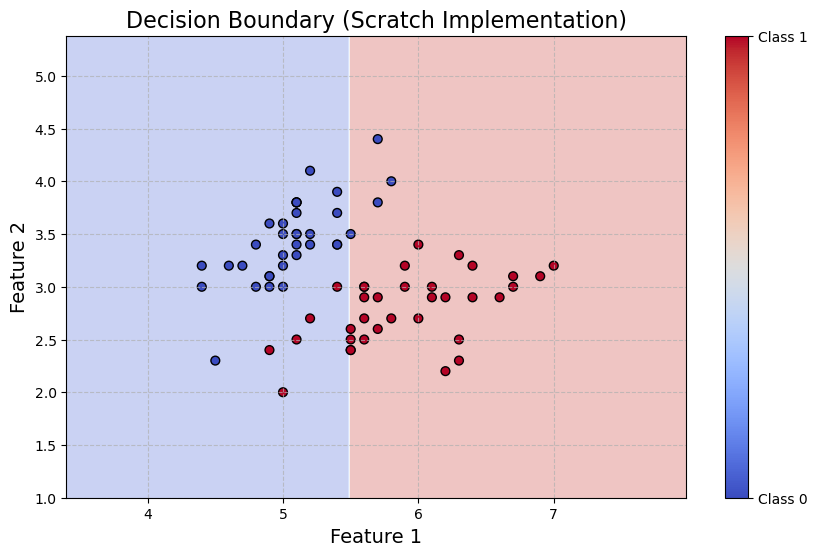

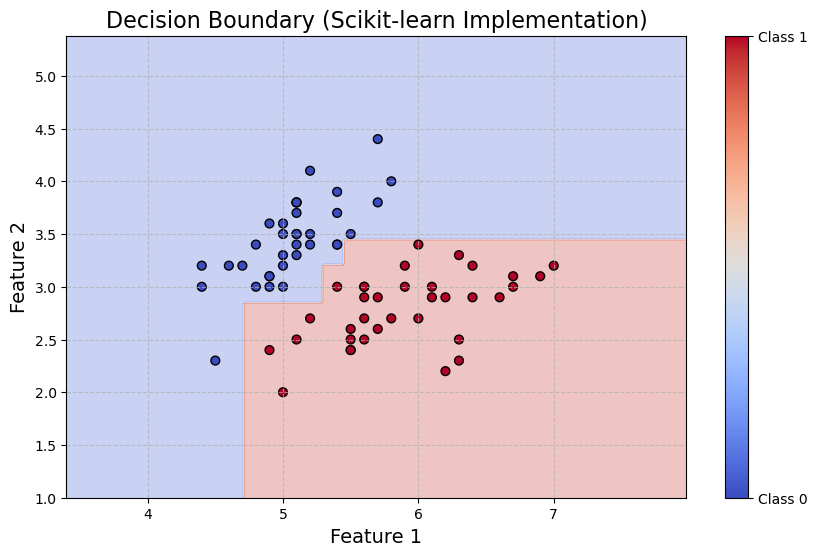

In [8]:
import matplotlib.pyplot as plt

# Define a function to plot decision boundary
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, title):
    # Create a meshgrid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict the class labels for each point in the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and training data points
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=40, edgecolors='k')
    
    # Add a color bar
    cbar = plt.colorbar(scatter, ticks=[0, 1])
    cbar.ax.set_yticklabels(['Class 0', 'Class 1'])
    
    plt.title(title, fontsize=16)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Visualize decision area for scratch implementation
plot_decision_boundary(scratch_clf, X_train, y_train, 'Decision Boundary (Scratch Implementation)')

# Visualize decision area for scikit-learn implementation
plot_decision_boundary(sklearn_clf, X_train, y_train, 'Decision Boundary (Scikit-learn Implementation)')

## Problem Seven: (Advance assignment) Creation of a decision tree classifier class with a depth of 2

In [9]:
import numpy as np

class ScratchDecisionTreeClassifierDepth2:
    def __init__(self):
        self.best_threshold_first = None
        self.best_threshold_second = None
        self.best_feature_index_first = None
        self.best_feature_index_second = None
        self.majority_class_left_left = None
        self.majority_class_left_right = None
        self.majority_class_right_left = None
        self.majority_class_right_right = None
        
    def calculate_gini_impurity(self, class_counts):
        total_count = np.sum(class_counts)
        if total_count == 0:
            return 0.0
        proportions = class_counts / total_count
        gini = 1.0 - np.sum(proportions ** 2)
        return gini

    def calculate_information_gain(self, parent_counts, left_left_counts, left_right_counts, right_left_counts, right_right_counts):
        parent_gini = self.calculate_gini_impurity(parent_counts)
        total_samples = np.sum(parent_counts)
        
        left_left_weight = np.sum(left_left_counts) / total_samples
        left_right_weight = np.sum(left_right_counts) / total_samples
        right_left_weight = np.sum(right_left_counts) / total_samples
        right_right_weight = np.sum(right_right_counts) / total_samples
        
        left_left_gini = self.calculate_gini_impurity(left_left_counts)
        left_right_gini = self.calculate_gini_impurity(left_right_counts)
        right_left_gini = self.calculate_gini_impurity(right_left_counts)
        right_right_gini = self.calculate_gini_impurity(right_right_counts)
        
        information_gain = parent_gini - (
            left_left_weight * left_left_gini +
            left_right_weight * left_right_gini +
            right_left_weight * right_left_gini +
            right_right_weight * right_right_gini
        )
        
        return information_gain

    def fit(self, X, y):
        best_information_gain = -1
        
        for feature_index_first in range(X.shape[1]):
            thresholds_first = np.unique(X[:, feature_index_first])
            for threshold_first in thresholds_first:
                left_mask_first = X[:, feature_index_first] < threshold_first
                right_mask_first = ~left_mask_first
                
                y_left_first = y[left_mask_first]
                y_right_first = y[right_mask_first]
                
                if len(y_left_first) == 0 or len(y_right_first) == 0:
                    continue
                
                left_counts_first = np.bincount(y_left_first, minlength=2)
                right_counts_first = np.bincount(y_right_first, minlength=2)
                
                for feature_index_second in range(X.shape[1]):
                    thresholds_second = np.unique(X[right_mask_first][:, feature_index_second])
                    for threshold_second in thresholds_second:
                        left_mask_second = X[right_mask_first][:, feature_index_second] < threshold_second
                        right_mask_second = ~left_mask_second
                        
                        y_left_second = y[right_mask_first][left_mask_second]
                        y_right_second = y[right_mask_first][right_mask_second]
                        
                        if len(y_left_second) == 0 or len(y_right_second) == 0:
                            continue
                        
                        left_left_counts = np.bincount(y_left_second, minlength=2)
                        left_right_counts = np.bincount(y_right_second, minlength=2)
                        right_left_counts = np.bincount(y_right_first[left_mask_second], minlength=2)
                        right_right_counts = np.bincount(y_right_first[right_mask_second], minlength=2)
                        
                        parent_counts = np.bincount(y, minlength=2)
                        
                        information_gain = self.calculate_information_gain(
                            parent_counts, left_left_counts, left_right_counts, right_left_counts, right_right_counts)
                        
                        if information_gain > best_information_gain:
                            best_information_gain = information_gain
                            self.best_threshold_first = threshold_first
                            self.best_threshold_second = threshold_second
                            self.best_feature_index_first = feature_index_first
                            self.best_feature_index_second = feature_index_second
                            self.majority_class_left_left = np.argmax(left_left_counts)
                            self.majority_class_left_right = np.argmax(left_right_counts)
                            self.majority_class_right_left = np.argmax(right_left_counts)
                            self.majority_class_right_right = np.argmax(right_right_counts)

    def predict(self, X):
        if self.best_feature_index_first is None or self.best_feature_index_second is None:
            raise ValueError("The model has not been trained yet. Call fit() before predict().")
        
        predictions = []
        for sample in X:
            if sample[self.best_feature_index_first] < self.best_threshold_first:
                if sample[self.best_feature_index_second] < self.best_threshold_second:
                    predictions.append(self.majority_class_left_left)
                else:
                    predictions.append(self.majority_class_left_right)
            else:
                if sample[self.best_feature_index_second] < self.best_threshold_second:
                    predictions.append(self.majority_class_right_left)
                else:
                    predictions.append(self.majority_class_right_right)
        
        return np.array(predictions)

In [10]:
# Train and predict with the depth 2 scratch implementation
scratch_clf_depth2 = ScratchDecisionTreeClassifierDepth2()
scratch_clf_depth2.fit(X_train, y_train)
scratch_predictions_depth2 = scratch_clf_depth2.predict(X_test)
print('Scratch Depth 2 Model Predictions:', scratch_predictions_depth2)

# Calculate evaluation metrics for the depth 2 scratch implementation
scratch_accuracy_depth2 = accuracy_score(y_test, scratch_predictions_depth2)
scratch_precision_depth2 = precision_score(y_test, scratch_predictions_depth2)
scratch_recall_depth2 = recall_score(y_test, scratch_predictions_depth2)

# Print the evaluation results
print("Evaluation Metrics:")
print("Scratch Depth 2 Implementation:")
print(f"  Accuracy: {scratch_accuracy_depth2:.2f}")
print(f"  Precision: {scratch_precision_depth2:.2f}")
print(f"  Recall: {scratch_recall_depth2:.2f}")


Scratch Depth 2 Model Predictions: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1]
Evaluation Metrics:
Scratch Depth 2 Implementation:
  Accuracy: 0.67
  Precision: 0.60
  Recall: 1.00


Observation: The reduction in performance of the ScratchDecisionTreeClassifierDepth2 model could be due to overfitting because with more levels of depth, the model can learn more complex patterns that may not generalize well to unseen data (test set). This can lead to a lower accuracy on the test set compared to a simpler model like the depth 1 tree.